## Notebook to demonstrate alpha-shaping
- Change parameter alpha to increase/decrease 'tightness' of hull (i.e., bound around collection of points).
- Imagine trees are points. 

Originally written by Remi Proville
https://bitbucket.org/benglitz/fishualizer_public/src/master/

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

import sys 
sys.path.append('../scripts/')
import land_cover_analysis as lca
import land_cover_visualisation as lcv
import geopandas as gpd
import alpha_shaping_functions as asf

/home/tplas/anaconda3/envs/geo/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Example with real data:

In [2]:
image_path = '/home/tplas/data/gis/most recent APGB 12.5cm aerial/evaluation_tiles/117574_20221122/12.5cm Aerial Photo/117574-1_RGB_24_Shape/SK0852.tif'
im_tile = lca.load_tiff(image_path, datatype='da')

points_data = gpd.read_file('/home/tplas/data/gis/tree points test SK0852/tree points test.shp')
points_data = points_data.to_crs('epsg:27700')
## transform points into numpy arrY:
points_arr = np.vstack([points_data.geometry.x, points_data.geometry.y]).T
dt_data = Delaunay(points_arr)

(3, 8000, 8000) <class 'numpy.ndarray'>
(3, 8000, 8000) <class 'numpy.ndarray'>
(3, 8000, 8000) <class 'numpy.ndarray'>
(3, 8000, 8000) <class 'numpy.ndarray'>


Text(0.5, 0.92, 'Scrub outlines for different alpha values. SK0852 tile.')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


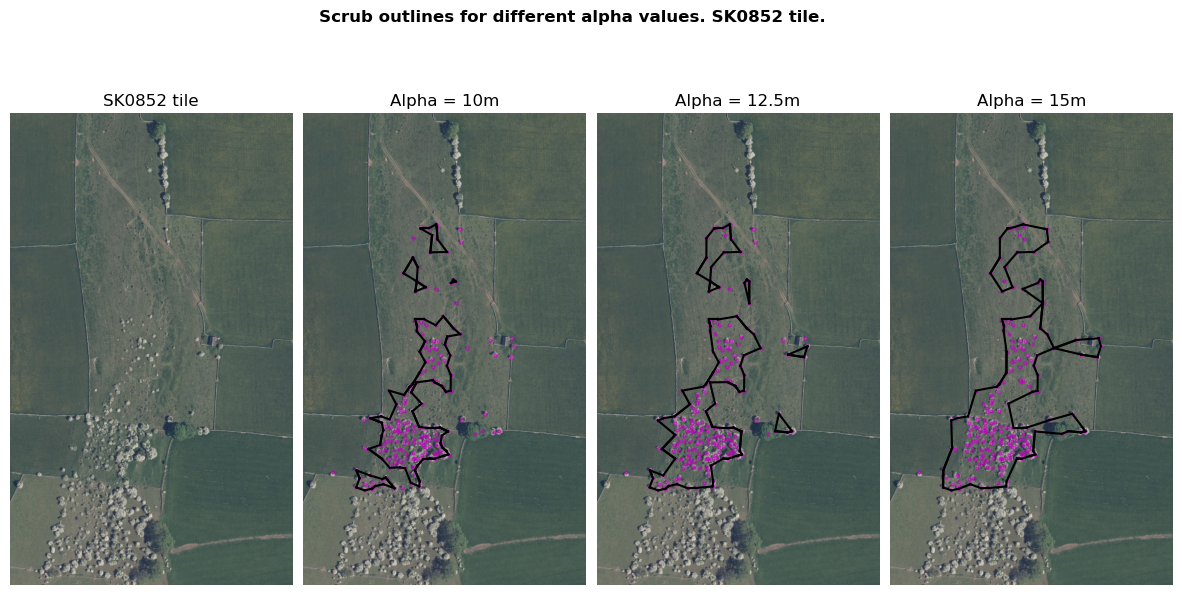

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(15, 8), gridspec_kw={'wspace': 0.04})



lcv.plot_image_simple(im=im_tile, ax=ax[0])
ax[0].set_xlim([408700, 408999])
ax[0].set_ylim([352250, 352750])
ax[0].set_title('SK0852 tile')
for i_plot, alpha in enumerate([10, 12.5, 15]):
    curr_ax = ax[i_plot + 1]
    asf.random_alpha_shape(dt=dt_data, points=points_arr, alpha=alpha, ax=curr_ax,
                                plot_convex_hull=False, plot_inner_lines=False,
                                plot_all_lines=False, plot_hull_points=False)


    curr_ax.set_xlim([408700, 408999])
    curr_ax.set_ylim([352250, 352750])
    lcv.plot_image_simple(im=im_tile, ax=curr_ax)
    curr_ax.set_title(f'Alpha = {alpha}m')

plt.suptitle('Scrub outlines for different alpha values. SK0852 tile.', weight='bold', y=0.92)